In [1]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Prática 2 - CIFAR 10

Semelhantemente ao MNIST, agora utilizaremos outra base de dados disponível no tensorflow.
Desta vez, utilizaremos o CIFAR10, base de dados que possui 10 classes divididas em animais e meios de transporte.

De forma geral, podemos pensar neste dataset como:
* Complexidade moderada: os objetos estão em diferentes posições e ângulos. Existe também uma variabilidade dos objetos. Se olharmos para a classe "bird" por exemplo, ela vai desde pássaros, galinhas, até avestruz. Também existe um background diferenciado a cada imagem, aumentando também um pouco a complexidade do modelo.
* Processamento rápido: as imagens são pequenas (32x32), apesar de imagens serem coloridas (3 canais de cores)

![Title](imgs/cifar10_dataset.png) 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 102s 1us/step


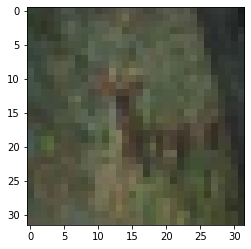

In [3]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image)
plt.show()

### Normalização

In [4]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

### One hot encoder

In [5]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

### Treino e Validação

In [6]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape

# 3 camadas

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

### Arquitetura da rede neural tradicional

In [8]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(240, input_dim = 1024*3)) # 32x32x3 - 3 camadas BGR
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.3))
rede_simples.add(Dense(512)) # Podemos aumentar em múltiplos de 2 para os próximos Dense()
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.3))
rede_simples.add(Dense(512))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.3))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

In [19]:
import tensorflow as tf

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [20]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
625/625 [==============================] - 8s 11ms/step - loss: 2.0888 - accuracy: 0.2041 - val_loss: 1.9476 - val_accuracy: 0.2383
Epoch 2/150
625/625 [==============================] - 6s 10ms/step - loss: 1.9995 - accuracy: 0.2426 - val_loss: 1.8921 - val_accuracy: 0.2989
Epoch 3/150
625/625 [==============================] - 7s 11ms/step - loss: 1.9812 - accuracy: 0.2558 - val_loss: 1.9043 - val_accuracy: 0.2966
Epoch 4/150
625/625 [==============================] - 7s 11ms/step - loss: 1.9585 - accuracy: 0.2675 - val_loss: 1.8906 - val_accuracy: 0.3015
Epoch 5/150
625/625 [==============================] - 6s 10ms/step - loss: 1.9530 - accuracy: 0.2694 - val_loss: 1.8674 - val_accuracy: 0.3096
Epoch 6/150
625/625 [==============================] - 7s 10ms/step - loss: 1.9439 - accuracy: 0.2740 - val_loss: 1.8579 - val_accuracy: 0.3316
Epoch 7/150
625/625 [==============================] - 7s 11ms/step - loss: 1.9317 - accuracy: 0.2795 - val_loss: 1.9235 - val_accuracy:

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 1s 3ms/step


0.3517

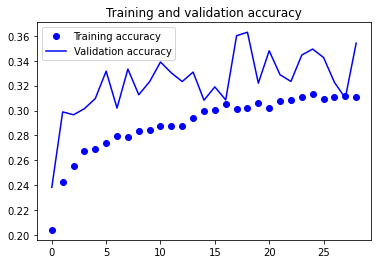

In [22]:
loss = historico.history['accuracy']
val_loss = historico.history['val_accuracy']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [17]:
# Maior acurácia
np.max(loss)

0.34834998846054077